In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')


In [6]:
START_DATE, END_DATE = '2000-01-01', '2022-12-31'
SYMBOLS = ['AAPL']


In [7]:
msft_df = yf.download(
    'MSFT',                 # one stock or list of stock symbols ['AAPL','MSFT','AMZN']
    start=START_DATE,       # from date
    end=END_DATE,           # to date
    # auto_adjust=True,     # adjust OHLC automatically?
    # actions=True,         # download dividends & stock splits
    # interval="1d",        # Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo Intraday data cannot extend last 60 days
    progress=False
)
msft_df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
msft_df.tail()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2022-12-23,236.110001,238.869995,233.940002,238.729996,238.729996,21207000
2022-12-27,238.699997,238.929993,235.830002,236.960007,236.960007,16688600
2022-12-28,236.889999,239.720001,234.169998,234.529999,234.529999,17457100
2022-12-29,235.649994,241.919998,235.649994,241.009995,241.009995,19770700
2022-12-30,238.210007,239.960007,236.660004,239.820007,239.820007,21930800


In [8]:
""" 
stock prices are usually non-stationary, which means that their means & variance change
over time. For any time-series analysis, stock data series must be stationary. Hence we
convert the stock prices to returns, which have constant mean & variance over time.
We have various types of returns
    Simple returns: aggregate over assets; simple returns of a portfolio is the weighted 
      sum of returns ofindividual assets in the portfolio. 
      It is calculated using formula below
            R[t] = (P[t] - P[t-1]) / P[t-1] = (P[t] / P[t-1]) - 1
    Log returns: aggregate over time & is calculated using formula below
            r[t] = log(P[t] / P[t-1]) = log(P[t]) - log(P[t-1])
    where P[t] is price of the asset at any time 't' - above formulae do not consider dividends!
Best practice when using stock prices is to use adjusted values, which take into
account variations due to stock-split, dividends etc. (also called Corporate Actions)
"""

# calculate the returns on Adj close price
df = msft_df.loc[:, ['Adj_Close']]
# pandas has the formula for simple returns as below
df['Simple_Rtn'] = df.Adj_Close.pct_change()
df['Log_Rtn'] = np.log(df.Adj_Close / df.Adj_Close.shift(1))
df.head()


,Adj_Close,Simple_Rtn,Log_Rtn
Date,,,
1999-12-31,36.511280,NaN,NaN
2000-01-03,36.452641,-0.001606,-0.001607
2000-01-04,35.221264,-0.033780,-0.034364
2000-01-05,35.592651,0.010544,0.010489
2000-01-06,34.400337,-0.033499,-0.034073


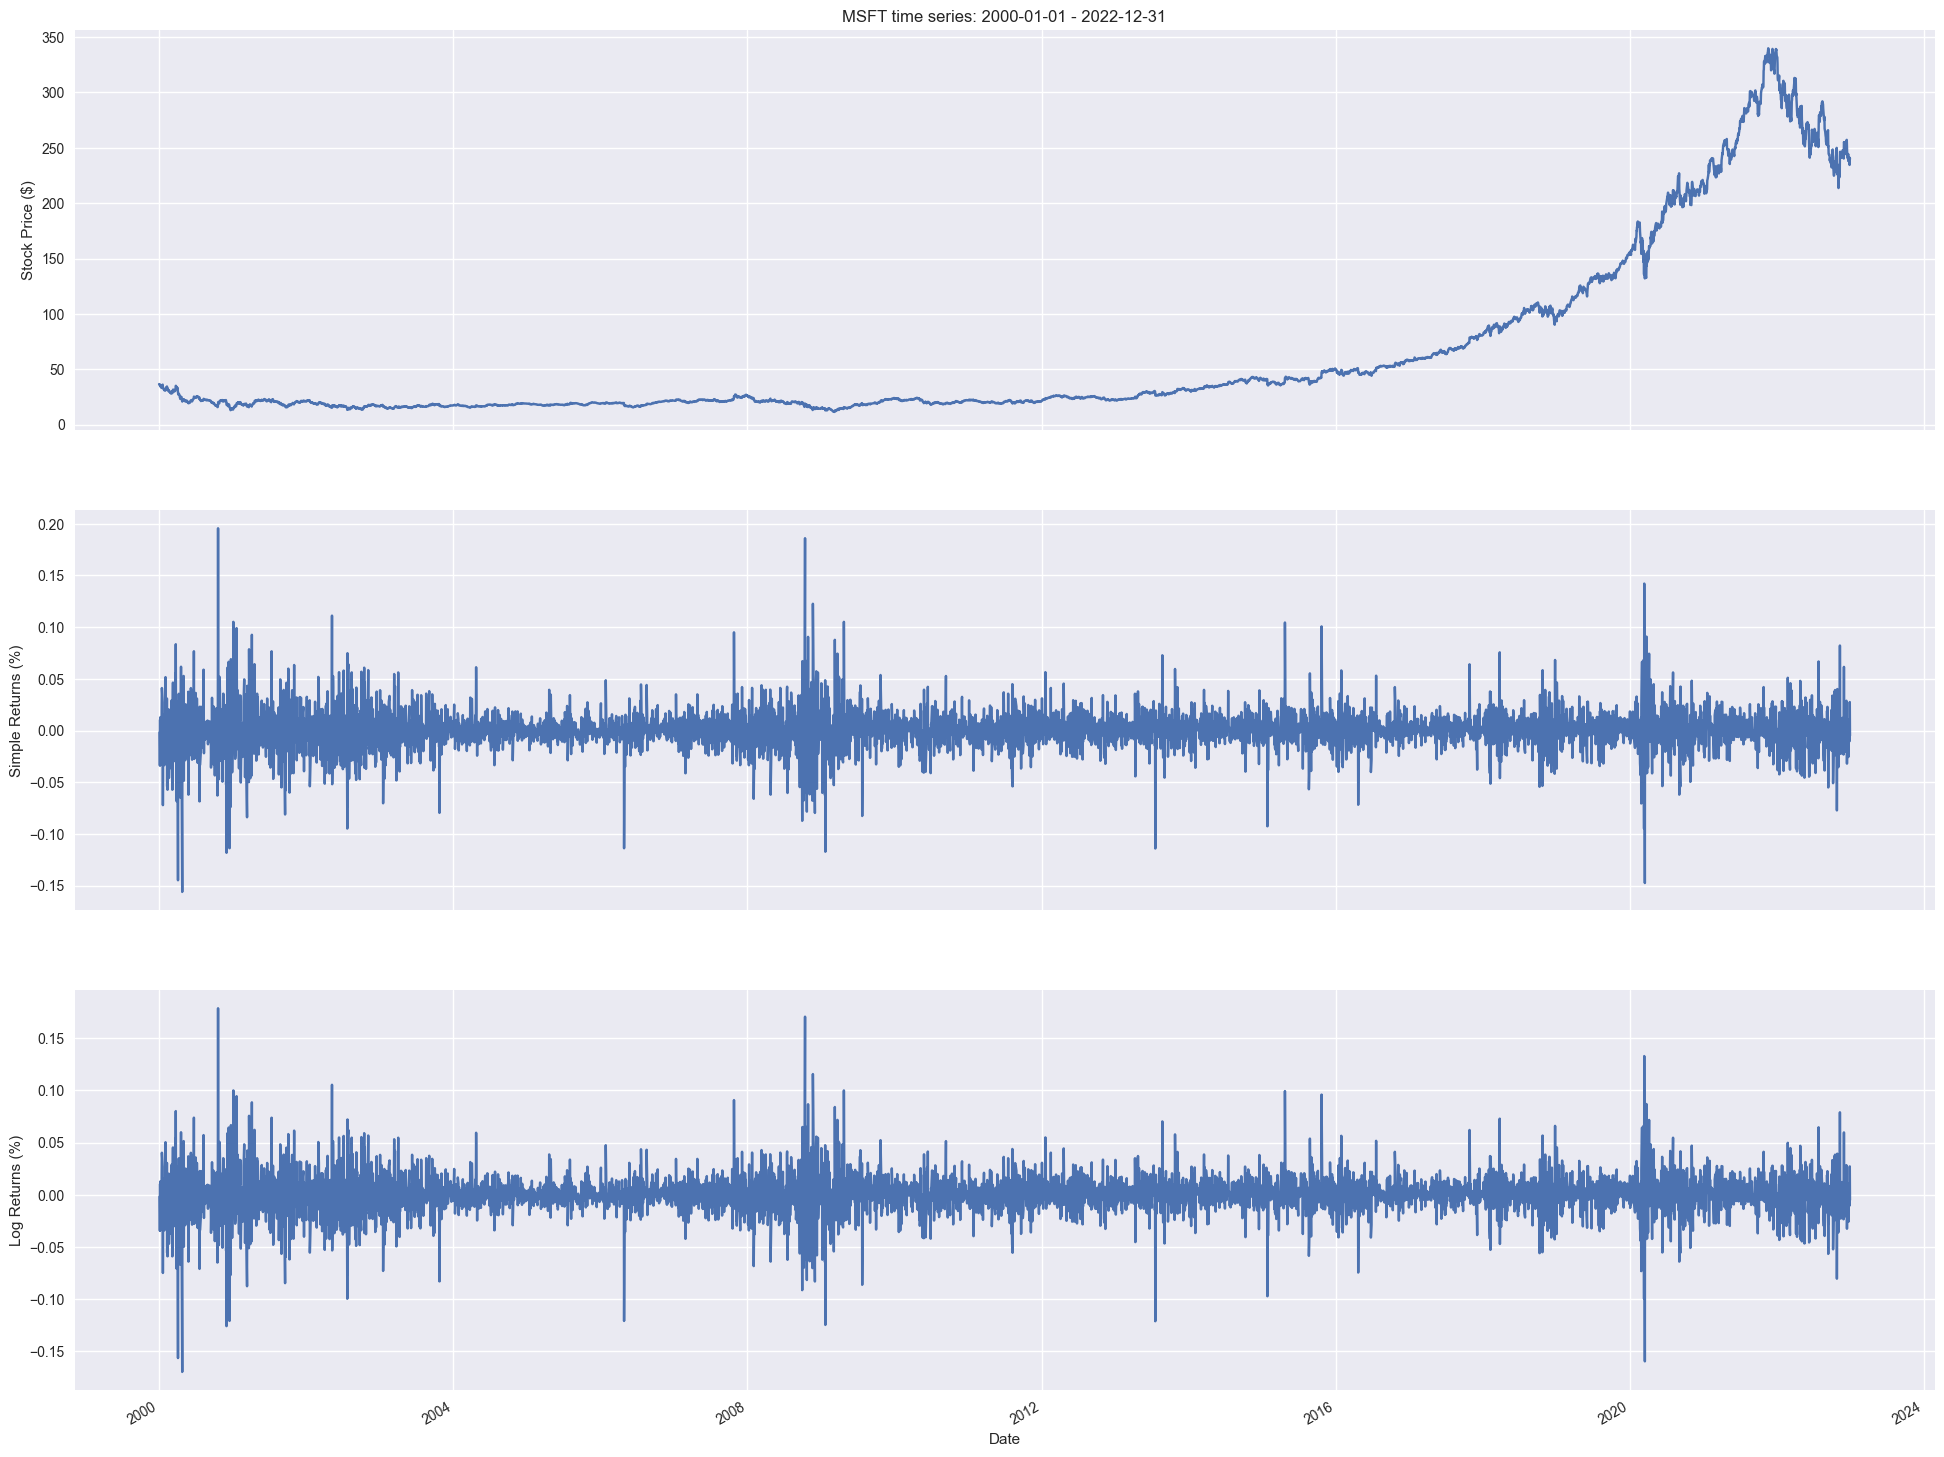

: 

: 

In [ ]:
# plot the data using traditional Matplotlib calls
fig, ax = plt.subplots(3, 1, figsize=(24, 20), sharex=True)
df.Adj_Close.plot(ax=ax[0])
ax[0].set(title=f"MSFT time series: {START_DATE} - {END_DATE}", ylabel="Stock Price ($)")
df.Simple_Rtn.plot(ax=ax[1])
ax[1].set(ylabel="Simple Returns (%)")
df.Log_Rtn.plot(ax=ax[2])
ax[2].set(xlabel="Date", ylabel="Log Returns (%)")
plt.show()


In [9]:
# using cufflinks & plotly
import nbformat
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

# set up configuration (run it once)
# cf.set_config_file(world_readable=True, theme='pearl', offline=True)
df.iplot(subplots=True, shape=(3, 1), shared_xaxes=True, title=f"MSFT time series: {START_DATE} - {END_DATE}")
